In [1]:
# Импорт библиотек
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
import torchvision as tv
import time

In [2]:
# Число бачей
bs = 256

In [3]:
# Загружаем данные
train_dataset = tv.datasets.FashionMNIST('.', train = True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=bs)
test = torch.utils.data.DataLoader(test_dataset, batch_size=bs)

100%|██████████| 26421880/26421880 [04:44<00:00, 92994.17it/s] 


Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<?, ?it/s]


Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 7432839.50it/s]


Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\FashionMNIST\raw



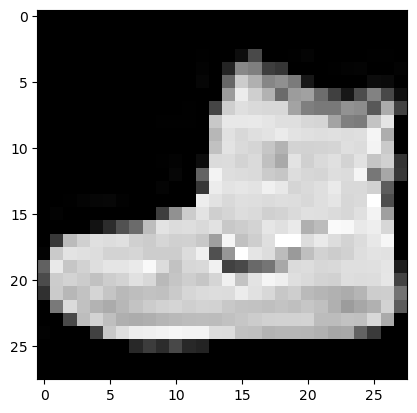

In [4]:
# Пример изображения
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [5]:
# Число классов - 10
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Создаем простую модель как на практике
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [7]:
# Ставим как на практике оптимизатор градиентный спуск и функцию потерь CrossEntropyLoss
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.1)
num_epochs = 15

In [8]:
# Обучаем модель
def train_model():
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
    
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
    
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
        
        print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )


In [9]:
train_model()
# Получаем точность на тесте 0,8639

ep: 0, train_loss: 0.8608563251951907, train_acc: 0.7140666666666666, test_loss: 0.775048641115427, test_acc: 0.7253
ep: 1, train_loss: 0.552211661034442, train_acc: 0.8077166666666666, test_loss: 0.6477062597870826, test_acc: 0.7727
ep: 2, train_loss: 0.4916766109618735, train_acc: 0.8283666666666667, test_loss: 0.5559326089918614, test_acc: 0.8061
ep: 3, train_loss: 0.45873873398659076, train_acc: 0.8392, test_loss: 0.5106687806546688, test_acc: 0.82
ep: 4, train_loss: 0.4357680341030689, train_acc: 0.8477333333333333, test_loss: 0.4784102328121662, test_acc: 0.8298
ep: 5, train_loss: 0.4180014010439528, train_acc: 0.8534, test_loss: 0.45758517310023306, test_acc: 0.8392
ep: 6, train_loss: 0.40363852686070384, train_acc: 0.8583333333333333, test_loss: 0.44085384011268614, test_acc: 0.8437
ep: 7, train_loss: 0.39139171268077605, train_acc: 0.8626833333333334, test_loss: 0.4291072368621826, test_acc: 0.8482
ep: 8, train_loss: 0.38090997718750164, train_acc: 0.8659666666666667, test_los

In [10]:
# Изменим модель
# Для начала попробуем менять оптимизаторы
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
trainer = torch.optim.RMSprop(model.parameters(), lr=0.1)
train_model()
# Получаем низкую точность

ep: 0, train_loss: 185.54452780713427, train_acc: 0.5413166666666667, test_loss: 3.377155824005604, test_acc: 0.5706
ep: 1, train_loss: 1.8367763526896213, train_acc: 0.5575333333333333, test_loss: 1.5729563392698764, test_acc: 0.5366
ep: 2, train_loss: 1.8959310394652347, train_acc: 0.5186833333333334, test_loss: 1.36993907392025, test_acc: 0.5267
ep: 3, train_loss: 2.2339275081106957, train_acc: 0.46726666666666666, test_loss: 1.5423120081424713, test_acc: 0.4377
ep: 4, train_loss: 1.4245238192537997, train_acc: 0.4355, test_loss: 1.4503286227583885, test_acc: 0.4039
ep: 5, train_loss: 1.5727020167289896, train_acc: 0.4471333333333333, test_loss: 1.35480395257473, test_acc: 0.5002
ep: 6, train_loss: 1.7221907077951635, train_acc: 0.3799, test_loss: 2.1033694565296175, test_acc: 0.1905
ep: 7, train_loss: 2.1343200272702156, train_acc: 0.20333333333333334, test_loss: 2.068955385684967, test_acc: 0.1952
ep: 8, train_loss: 2.186567492687956, train_acc: 0.22381666666666666, test_loss: 2.0

In [14]:
# Для оптимизатора Adam
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=0.1)
train_model()
# Получаем точность ниже, чем при спуске

ep: 0, train_loss: 2.683163329134596, train_acc: 0.6118333333333333, test_loss: 0.7561386369168759, test_acc: 0.7367
ep: 1, train_loss: 0.7267020496916263, train_acc: 0.74205, test_loss: 0.7405859388411045, test_acc: 0.7477
ep: 2, train_loss: 0.6594821531721886, train_acc: 0.76065, test_loss: 0.6940270885825157, test_acc: 0.7684
ep: 3, train_loss: 0.6584527214790913, train_acc: 0.7648166666666667, test_loss: 0.7339605048298836, test_acc: 0.7713
ep: 4, train_loss: 0.6757610506199776, train_acc: 0.7568333333333334, test_loss: 0.73151750639081, test_acc: 0.7572
ep: 5, train_loss: 0.6576279376415496, train_acc: 0.7632, test_loss: 0.7468474552035331, test_acc: 0.7534
ep: 6, train_loss: 0.6610102694085304, train_acc: 0.7650833333333333, test_loss: 0.9201384983956814, test_acc: 0.7244
ep: 7, train_loss: 0.6586877258534127, train_acc: 0.7641, test_loss: 0.785281328856945, test_acc: 0.7564
ep: 8, train_loss: 0.6720324400891649, train_acc: 0.7617833333333334, test_loss: 0.8617226280272007, test_

In [15]:
# Попробуем просто увеличить количество слоев

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 124),
    torch.nn.ReLU(),
    torch.nn.Linear(124, 62),
    torch.nn.ReLU(),
    torch.nn.Linear(62, 10)
)
trainer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model()
# Точность 0,8603

ep: 0, train_loss: 1.3177809436270531, train_acc: 0.51005, test_loss: 0.944414596259594, test_acc: 0.6546
ep: 1, train_loss: 0.6713382226355532, train_acc: 0.7512833333333333, test_loss: 0.73448301628232, test_acc: 0.733
ep: 2, train_loss: 0.5526158061433346, train_acc: 0.8009166666666667, test_loss: 0.5930921085178852, test_acc: 0.7844
ep: 3, train_loss: 0.489221120768405, train_acc: 0.8241, test_loss: 0.5266956843435764, test_acc: 0.8105
ep: 4, train_loss: 0.44922923534474474, train_acc: 0.8369333333333333, test_loss: 0.4811359576880932, test_acc: 0.8267
ep: 5, train_loss: 0.42125163040262587, train_acc: 0.8470666666666666, test_loss: 0.4562217406928539, test_acc: 0.8355
ep: 6, train_loss: 0.3992107657676047, train_acc: 0.8547333333333333, test_loss: 0.4438879355788231, test_acc: 0.8409
ep: 7, train_loss: 0.3818746569308829, train_acc: 0.8613, test_loss: 0.43170753084123137, test_acc: 0.8448
ep: 8, train_loss: 0.3674866165886534, train_acc: 0.8662666666666666, test_loss: 0.4214861594

In [14]:
# Добавляем батч нормализацию
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.SGD(model.parameters(), lr=0.1)
# И немного дольше обучаем
num_epochs = 20
train_model()
# Точность 0,8784

ep: 0, train_loss: 0.4580894259696311, train_acc: 0.8360666666666666, test_loss: 0.4198960348963737, test_acc: 0.849
ep: 1, train_loss: 0.3430660901551551, train_acc: 0.87485, test_loss: 0.39687392562627793, test_acc: 0.8562
ep: 2, train_loss: 0.3115665966525991, train_acc: 0.8865166666666666, test_loss: 0.36732778027653695, test_acc: 0.8664
ep: 3, train_loss: 0.2889496900299762, train_acc: 0.8937, test_loss: 0.3562794096767902, test_acc: 0.8714
ep: 4, train_loss: 0.2745618828433625, train_acc: 0.89845, test_loss: 0.36315982770174743, test_acc: 0.8684
ep: 5, train_loss: 0.26809685807278816, train_acc: 0.9007833333333334, test_loss: 0.3709750112146139, test_acc: 0.8656
ep: 6, train_loss: 0.2599972594291606, train_acc: 0.9034666666666666, test_loss: 0.35195418167859316, test_acc: 0.871
ep: 7, train_loss: 0.2508061926415626, train_acc: 0.9078, test_loss: 0.3655282348394394, test_acc: 0.8689
ep: 8, train_loss: 0.24802279497714752, train_acc: 0.9088666666666667, test_loss: 0.350597321242094

In [16]:
# Вернем Adam
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=0.01)
train_model()
# Точность 0,8812

ep: 0, train_loss: 0.46137926464385176, train_acc: 0.8321666666666667, test_loss: 0.42912350296974183, test_acc: 0.8423
ep: 1, train_loss: 0.36635467188155396, train_acc: 0.8660666666666667, test_loss: 0.4111369799822569, test_acc: 0.8521
ep: 2, train_loss: 0.3379133057087026, train_acc: 0.8743666666666666, test_loss: 0.37543742042034867, test_acc: 0.8659
ep: 3, train_loss: 0.310529111547673, train_acc: 0.8856333333333334, test_loss: 0.36811843458563087, test_acc: 0.867
ep: 4, train_loss: 0.29531267481915496, train_acc: 0.8900333333333333, test_loss: 0.3707805753685534, test_acc: 0.8656
ep: 5, train_loss: 0.2777525930962664, train_acc: 0.8967, test_loss: 0.3617953397333622, test_acc: 0.8729
ep: 6, train_loss: 0.2671390428187999, train_acc: 0.89965, test_loss: 0.3571590844541788, test_acc: 0.8741
ep: 7, train_loss: 0.25742407409434626, train_acc: 0.9031333333333333, test_loss: 0.35456664990633724, test_acc: 0.8739
ep: 8, train_loss: 0.2518016458825862, train_acc: 0.9063833333333333, tes